In [1]:
# -*- coding: utf-8 -*-
"""
Created on Thu Dec 23 23:13:22 2021

@author: Mikhail Morozov
"""
import numpy as np
import pandas as pd
import random

from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score as r2
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

trainf = 'E:/Mike/Python/Project/Data/train.csv'
testf = 'E:/Mike/Python/Project/Data/test.csv'
out = 'E:/Mike/Python/Project/Data/prediction.csv'

def Plot(type_, x, y, title, name_x, name_y, *args): #bins_=30, s=1,
    plt.figure(figsize = (16, 8))
    if type_ == 'scatter' and  len(args)>0:
        s,c,cmap = args[0],args[1],args[2]
        plt.scatter(x, y, s=s, c=c, cmap=cmap)
    elif type_ == 'hist' and len(args) == 1:
        bins = args[0]
        plt.hist(x, bins=bins)
    elif type_ == 'bar'and len(args) == 4:
        w, al,ed,lw = args[0],args[1],args[2],args[3]
        plt.bar(x, y,width=w, alpha=al,edgecolor=ed,linewidth=lw)
    elif type_ == 'plot'and len(args) == 0:
        plt.plot(x, y)    
    plt.xlabel(name_x)
    plt.ylabel(name_y)
    plt.title(title)
    plt.show()

 
# Функция для подвыборки из данных    
def Select(data, x_col, cut):
    x_max = data[x_col].quantile(1-cut)
    x_min = data[x_col].quantile(cut)
    return data[(data[x_col]>=x_min)&(data[x_col]<=x_max)]
# Функция для кодирования не числовых пременных    
def Enc(data, cols):
    enc = OrdinalEncoder()
    for col in cols:
        X = data[col].values.reshape(-1, 1)
        data[col] = enc.fit_transform(X,X)
    return(data)

 
def Square(s,sl,sk, s_max, s_min, sl_max, sk_max):
    if sl > sl_max: sl=0
    if sk > sk_max: sk=0
    if s<s_min or s>s_max:
        if s < sl + sk: s = sl + sk
    return(s)

def evaluate_preds(y_train, y_train_preds, y_test, y_test_preds, X_train, X_test):
    print("Train R2:\t" + str(round(r2(y_train, y_train_preds), 3)))
    print("Test R2:\t" + str(round(r2(y_test, y_test_preds), 3)))
    
    plt.figure(figsize=(18,10))
    
    plt.subplot(121)
    sns.scatterplot(x=X_train, y=y_train)
    sns.scatterplot(x=X_train, y=y_train_preds, alpha = 0.5)
    plt.xlabel('Square')
    plt.ylabel('Prediction/True')
    plt.title('Training Dataset')
    
    plt.subplot(122)
    sns.scatterplot(x=X_test, y=y_test)
    sns.scatterplot(x=X_test, y=y_test_preds)
    plt.xlabel('Square')
    plt.ylabel('Prediction/True')
    plt.title('Testing or Rescaled Dataset')

    plt.show()

train_df = pd.read_csv(trainf)
desc = train_df.describe()
train_df.info()


test_df = pd.read_csv(testf)

# Перекодируем значения столбцов
train_df_enc = Enc(train_df.copy(),['Ecology_2', 'Ecology_3', 'Shops_2'])








<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             10000 non-null  int64  
 1   DistrictId     10000 non-null  int64  
 2   Rooms          10000 non-null  float64
 3   Square         10000 non-null  float64
 4   LifeSquare     7887 non-null   float64
 5   KitchenSquare  10000 non-null  float64
 6   Floor          10000 non-null  int64  
 7   HouseFloor     10000 non-null  float64
 8   HouseYear      10000 non-null  int64  
 9   Ecology_1      10000 non-null  float64
 10  Ecology_2      10000 non-null  object 
 11  Ecology_3      10000 non-null  object 
 12  Social_1       10000 non-null  int64  
 13  Social_2       10000 non-null  int64  
 14  Social_3       10000 non-null  int64  
 15  Healthcare_1   5202 non-null   float64
 16  Helthcare_2    10000 non-null  int64  
 17  Shops_1        10000 non-null  int64  
 18  Shops_2

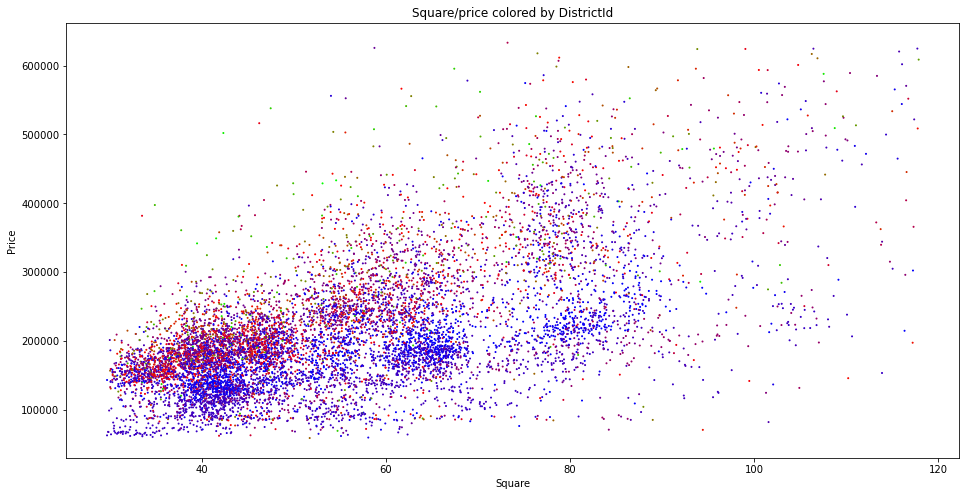

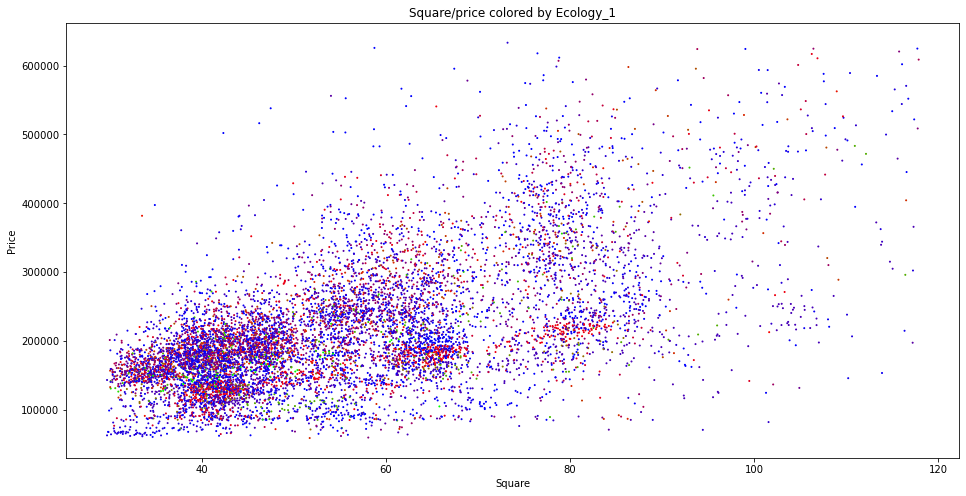

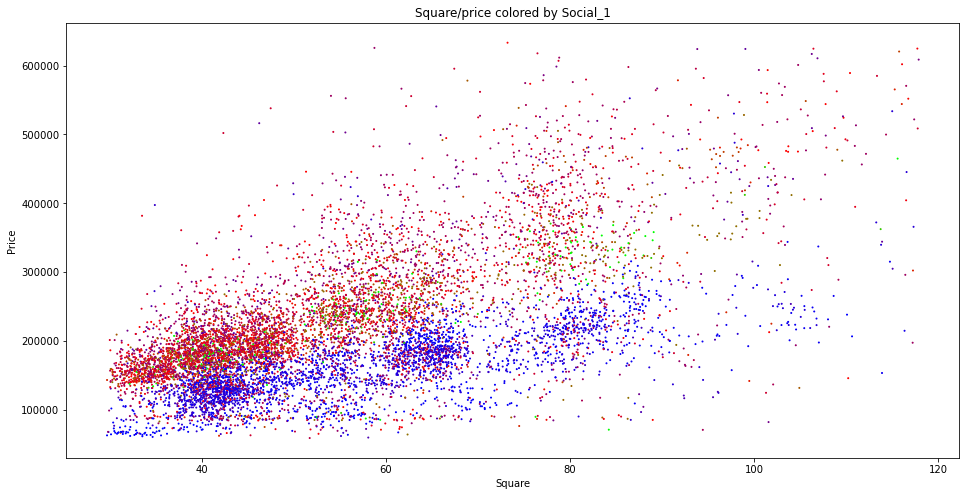

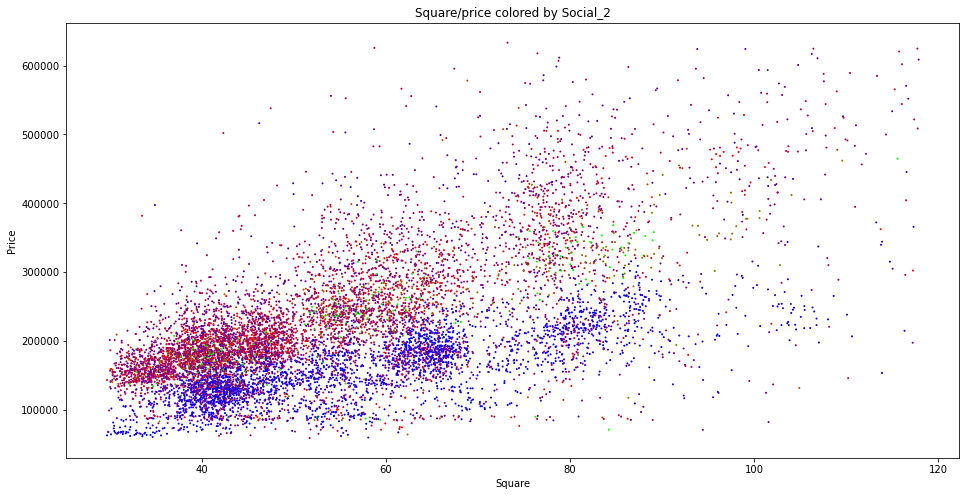

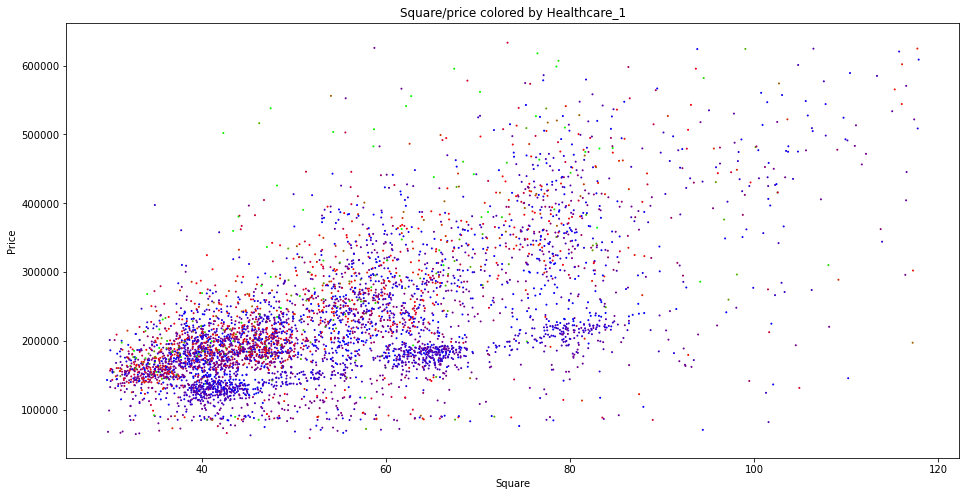

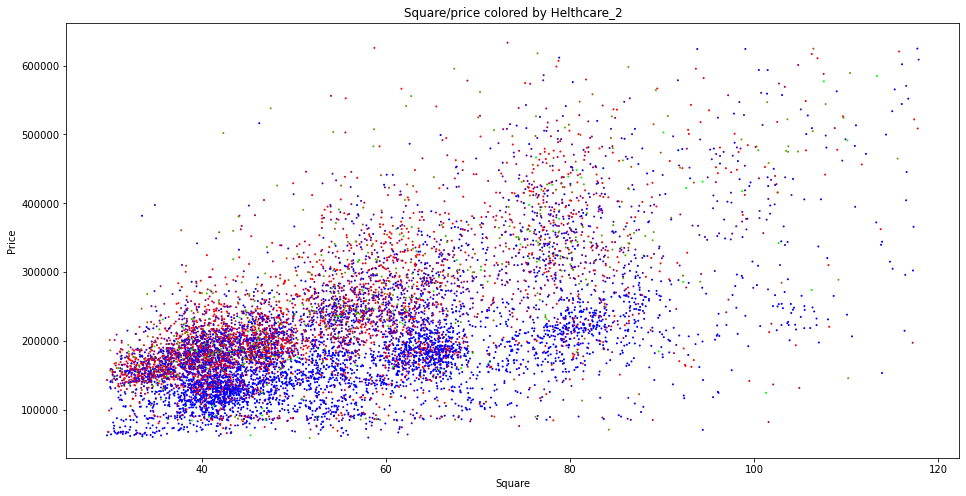

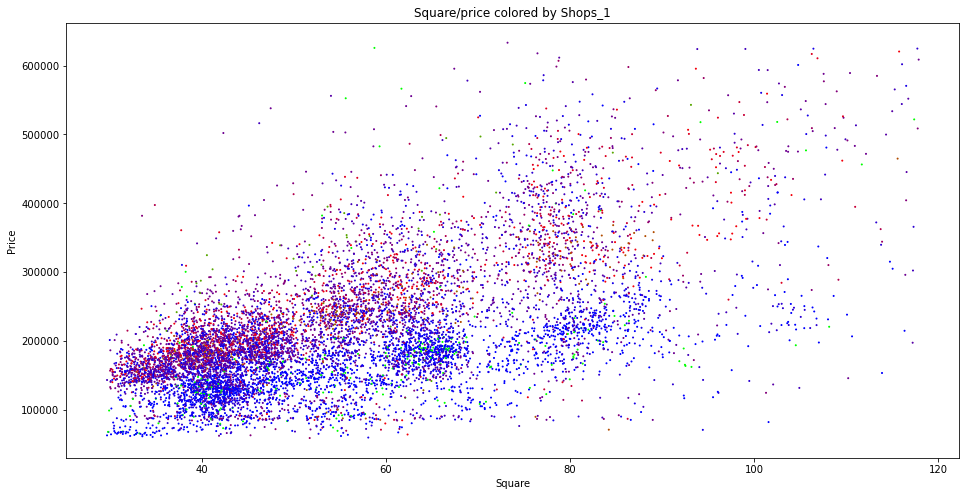

In [2]:




################################# WRANGLING ###############################

    
# Для начала попробовал просмотреть цены относительно каждого параметра, 
# выбросы делали графики не читаемыми, поэтому создал функцию выборки данных
# отсекающую заданное количество процентов выборки.
# Очевидно наиболее явный тренд был относительно графика площадь/цена
# На нем просматривалась некоторая кластеризация, поэтому решил подкрасить 
# Этот график всеми возможными параметрами для того чтобы понять какие именно 
# из них влияют на кластеризацию.


# for col in train_df_enc.columns:
#     if col not in ['Id', 'DistrictId', 'Ecology_1', 'Ecology_2',
#         'Ecology_3', 'Social_1', 'Social_2', 'Social_3', 'Healthcare_1',
#         'Helthcare_2', 'Shops_1', 'Shops_2', 'Price']:
#         try:
            
#             cur_df = Select(train_df_enc, col, 0.01)
#             for col_ in cur_df:
#                 Plot('scatter', cur_df[col], cur_df.Price, 
#                       f'{col} colored by {col_}', col,
#                       'Price', 1, cur_df[col_], 'brg')
            
#         except Exception as e:
#             print(col, e)
#     else: 
#         #Plot('scatter', train_df_enc[col], train_df_enc.Price, col, col,'Price')
#         for col_ in cur_df:
#             Plot('scatter', cur_df[col], cur_df.Price, 
#                   f'{col} colored by {col_}', col,'Price',
#                   1, cur_df[col_], 'brg')

# ['Id', 'DistrictId', 'Rooms', 'Square', 'LifeSquare', 'KitchenSquare',
#        'Floor', 'HouseFloor', 'HouseYear', 'Ecology_1', 'Ecology_2',
#        'Ecology_3', 'Social_1', 'Social_2', 'Social_3', 'Healthcare_1',
#        'Helthcare_2', 'Shops_1', 'Shops_2', 'Price', 'SqmPrice']
# В результате закомментированного вложенного цыкла получил набор графиков отношения параметров к цене
# Благодаря чему выделил набор приорететных переменных
# График которых представлены ниже:
# Судя по ним на кластеризацию данных графика цены/площадь влияли: 
# DistrictId, Social_1,Social_2,Healthcare_1, Healthcare_2,Shops_1, Ecology_1 их я и представлю

vars_of_interes_1 = ['DistrictId', 'Ecology_1', 'Social_1', 'Social_2', 'Healthcare_1','Helthcare_2', 'Shops_1']
vars_of_interes_2 = ['Floor', 'HouseFloor', 'HouseYear']
cur_df = Select(train_df_enc, 'Square', 0.01)
for col in train_df_enc.columns:
    if col in vars_of_interes_1:
        Plot('scatter', cur_df.Square, cur_df.Price,
             f'Square/price colored by {col}', 
             'Square','Price',1,cur_df[col],'brg')
vars_of_interes_1.append('Square') # добавим самую важную переменную


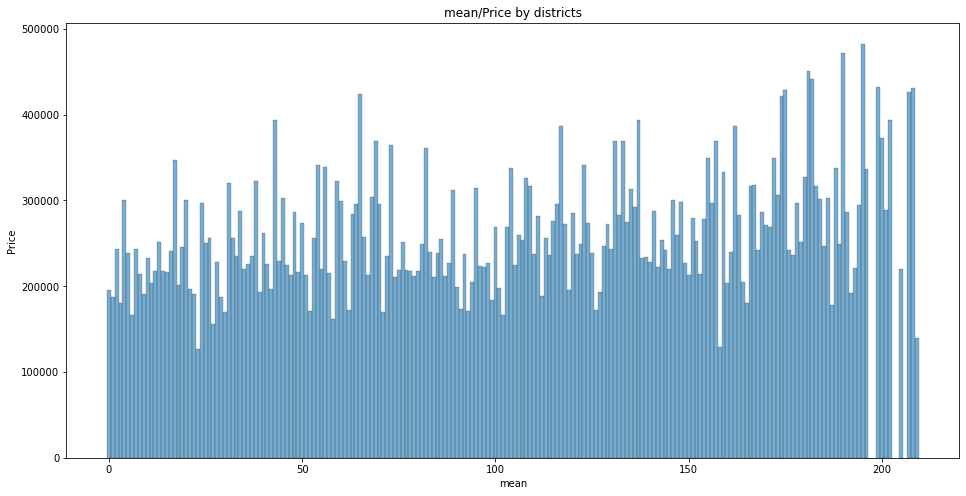

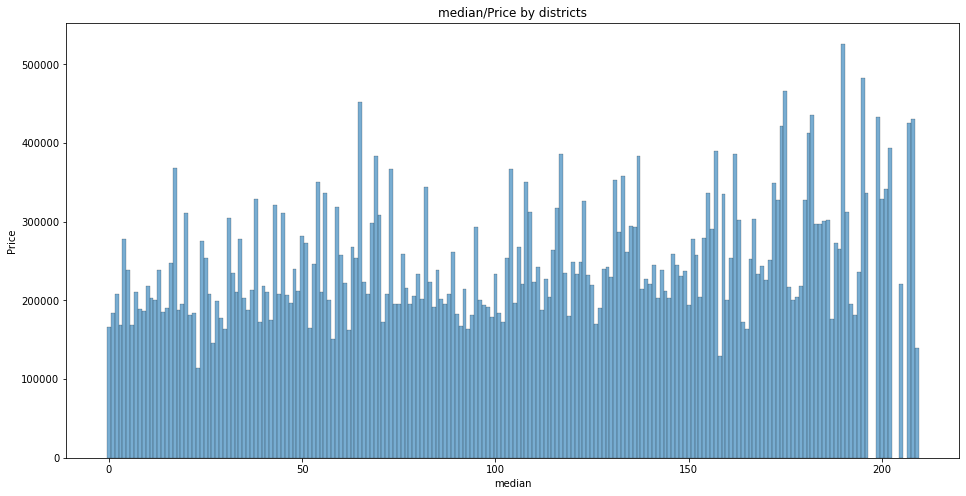

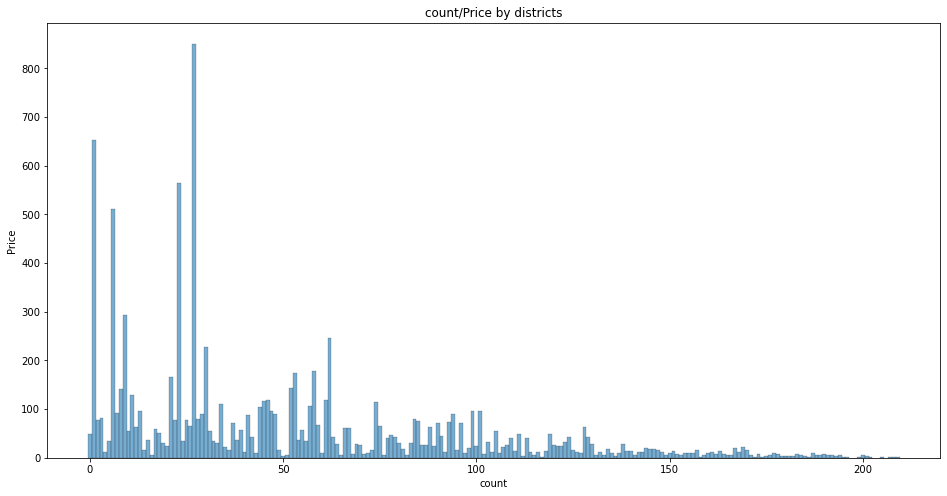

In [3]:
# Из опыта ценообразование в каждом районе может быть уникально, 
# попробую проверить эту гипотизу поскольку это может сильно изменить стратегию создания модели


check = train_df_enc[['Price', 'DistrictId']].groupby(['DistrictId']).agg(['mean', 'median','count'])
check.describe()
for col in check.columns:
    Plot('bar', check.index.values,check[col], f'{col[1]}/{col[0]} by districts', col[1], col[0], 1, 0.6, 'k', 0.3)



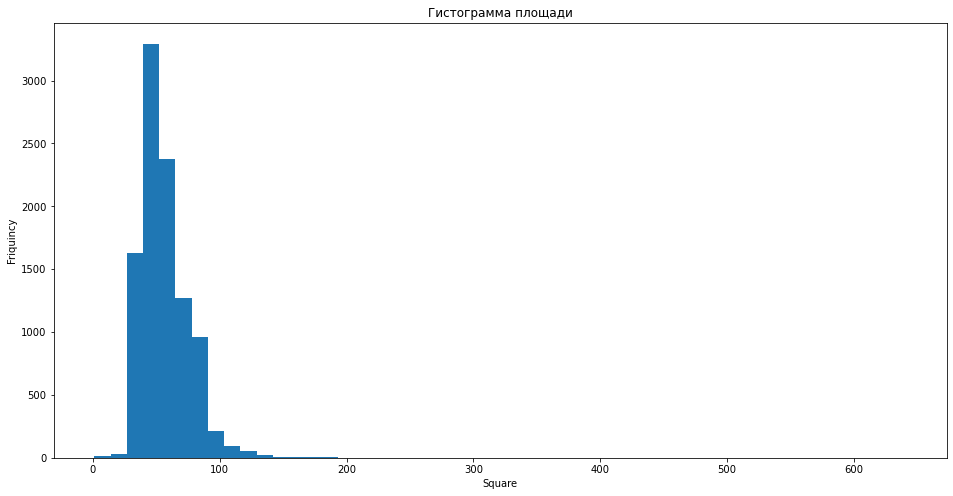

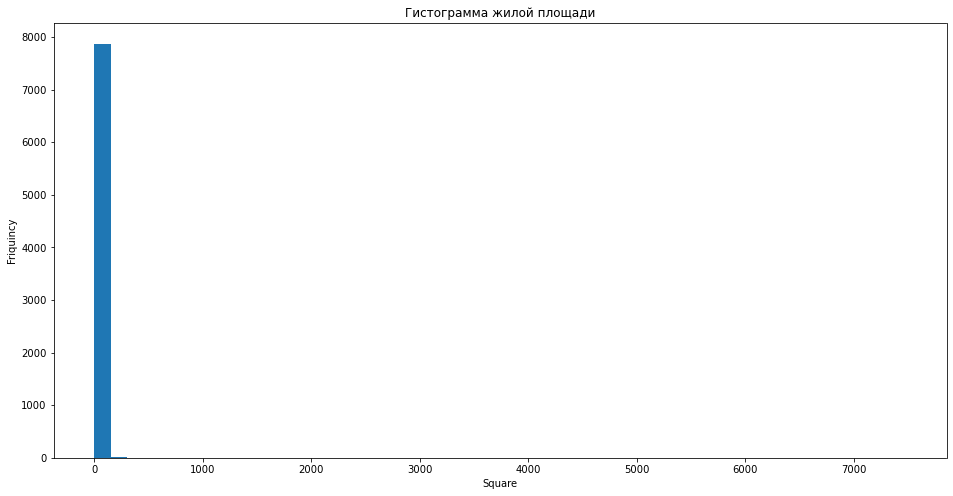

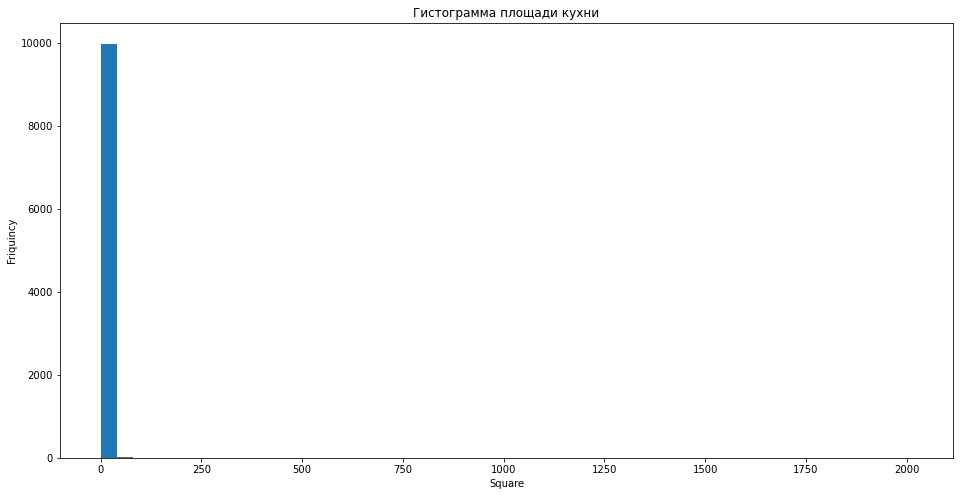

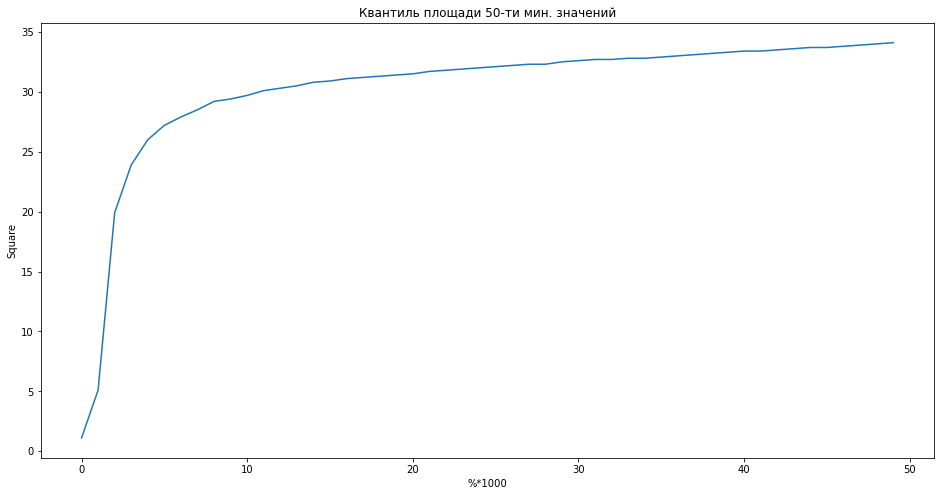

In [4]:
# Как видно из графиков и агрегированной таблици "check" в наборе данных 
# много районов имеющих маленькую выборку при этом разброс средних цен 
# по районам значительный. В комбинации эти два факта могут привести к пропуску 
# статистической информации в тренировочном сете выборки и как результат
# не верным предсказаниям по районам отсутствующим в тренировочном сете.
# Маленькое количество информации и большое количество переменный имеющих 
# не высокую корреляцию с целевым значением склоняет меня к использованию деревьев.
# При этом я скорей больше отдаю предпочтение выбору оптимальных параметров модели
# нежели особой обработки переменных, за исключением того, что я предпочту исключить
# из модели переменных не вошедшие в vars_of_interes_1 и vars_of_interes_2.

vars_of_interes = vars_of_interes_1 + vars_of_interes_2
train_df_enc.DistrictId.describe()
test_df.DistrictId.describe()
distr_not_in_train = [x for x in test_df.DistrictId.unique() if x not in train_df_enc.DistrictId.unique()]
distr_not_in_train.sort()
# В тестовых данных присутствуют районы не присутствующие в тренировочном:
# print(distr_not_in_train)
# но это всего несколько строк:
# print(test_df.DistrictId[test_df.DistrictId.isin(distr_not_in_train)])
describe_voi = train_df_enc[vars_of_interes].describe()
describe = train_df_enc.describe()

# Посмотрим качество данных главной переменной:
# print(train_df_enc.Square.describe())
# print(train_df_enc.LifeSquare.describe())
# print(train_df_enc.KitchenSquare.describe())

# Похоже есть грубоошибочные значения
square_qt = {i:np.round(train_df_enc.Square.quantile(i/1001),1) for i in range(1001)}
Plot('hist', train_df_enc.Square, 1, "Гистограмма площади", "Square","Friquincy",50)
Plot('hist', train_df_enc.LifeSquare, 1, "Гистограмма жилой площади", "Square","Friquincy",50)
Plot('hist', train_df_enc.KitchenSquare, 1, "Гистограмма площади кухни", "Square","Friquincy",50)
Plot('plot', [*square_qt][:50], list(square_qt.values())[:50], "Квантиль площади 50-ти мин. значений", "%*1000","Square")

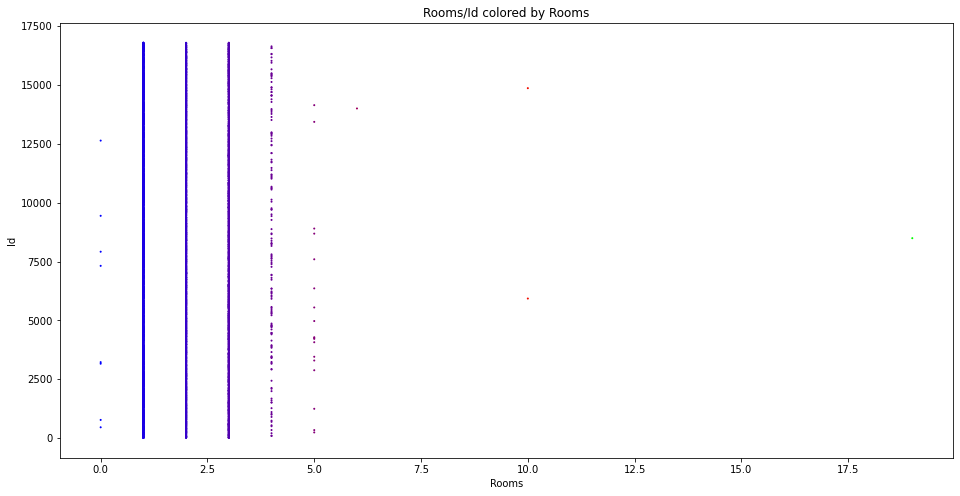

In [5]:
# print(train_df_enc.Square.nsmallest(30))
smallest1 = train_df_enc[['Square', 'LifeSquare', 'KitchenSquare','Price']].nsmallest(30, ['Square'])
smallest2 = train_df_enc[['Square', 'LifeSquare', 'KitchenSquare','Price']].nsmallest(30, ['LifeSquare'])
smallest3 = train_df_enc[['Square', 'LifeSquare', 'KitchenSquare','Price']].nsmallest(30, ['KitchenSquare'])
largest1 = train_df_enc[['Square', 'LifeSquare', 'KitchenSquare','Price']].nlargest(30, ['Square'])
largest2 = train_df_enc[['Square', 'LifeSquare', 'KitchenSquare','Price']].nlargest(30, ['LifeSquare'])
largest3 = train_df_enc[['Square', 'LifeSquare', 'KitchenSquare','Price']].nlargest(30, ['KitchenSquare'])
describe_smal_sq = smallest1[['Square', ]].describe()

# Очевидно значения площади нужно обработать. Все величины где разность 
# площади и жилой площади меньше нуля следует заменить на сумму жилой 
# площади и площади кухни. Для начала необходимо заполнить пропуски.
square_err = train_df_enc[train_df_enc.Square-train_df_enc.LifeSquare-train_df_enc.KitchenSquare<0]

train_df_enc.LifeSquare.fillna(0, inplace = True)
train_df_enc.KitchenSquare.fillna(0, inplace = True)

# Определим адекватные значения для площадей тренировочного сета:
s_max = train_df_enc.Square.quantile(0.99)
s_min = train_df_enc.Square.quantile(0.01)
sl_max = train_df_enc.LifeSquare.quantile(0.99)
sk_max = 26

train_df_enc['Square_proc'] = 0
for i in range(len(train_df_enc)):
    x,y,z = train_df_enc.Square.iloc[i],train_df_enc.LifeSquare.iloc[i],train_df_enc.KitchenSquare.iloc[i]
    train_df_enc.loc[i:i,'Square_proc'] = Square(x,y,z, s_max, s_min, sl_max, sk_max)
    

train_df_enc[['Square', 'LifeSquare', 'KitchenSquare','Price','Square_proc']].nsmallest(30, ['Square'])
train_df_enc[['Square', 'LifeSquare', 'KitchenSquare','Price','Square_proc']].nlargest(30, ['Square']) 


# По прежнему остаются либо очень маленькие либо очень большие значения
# Добавим переменную, которая укажет на возможный выброс
s_max = 280
s_min = 16
train_df_enc['Outlayers'] = (np.array(train_df_enc.Square_proc>s_max)+np.array(train_df_enc.Square_proc<s_min))*1

# И постараемся заменить несколько явных выбросов адекватным значением
for i in train_df_enc.index.values[train_df_enc.Square_proc > 280]:
    train_df_enc.loc[i:i,'Square_proc'] = train_df_enc.loc[i:i,'Square_proc']/10
# Обработка комнат: все значения что не соотносятся с площадью и выходят за пределы (1:5) будут перещитаны
# Комнаты до обработки:
Plot('scatter', train_df_enc.Rooms, train_df_enc.Id,
     'Rooms/Id colored by Rooms',
     'Rooms','Id',1,train_df_enc.Rooms,'brg')
med_sq_per_room = (train_df_enc.Square_proc/train_df_enc.Rooms).median()


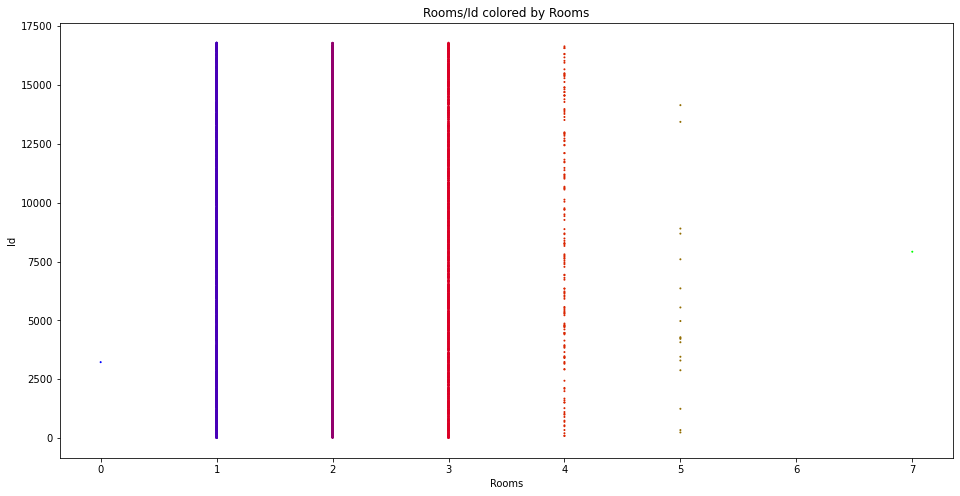

In [6]:
for i in range(len(train_df_enc)):
    rooms = train_df_enc.loc[i:i,'Rooms'].values[0]
    coef = (train_df_enc.loc[i:i,'Square_proc']/train_df_enc.loc[i:i,'Rooms']).values[0]
    if (coef/med_sq_per_room > 3 or coef/med_sq_per_room < 0.33) and (rooms>5 or rooms<1):
        train_df_enc.loc[i:i,'Rooms'] = np.round(train_df_enc.loc[i:i,'Square_proc']/med_sq_per_room).values[0]
# Комнаты после обработки:
Plot('scatter', train_df_enc.Rooms, train_df_enc.Id,
     'Rooms/Id colored by Rooms',
     'Rooms','Id',1,train_df_enc.Rooms,'brg')


In [7]:

# Переведем DistrictId в категоризированные переменные:
train_df_enc.DistrictId = train_df_enc.DistrictId.astype(str)
# Проверим есть ли у нас пропуски в данных:
for col in train_df_enc.columns:
    print(col, len(train_df_enc[train_df_enc[col].isna()]))
# Healthcare_1 содержит огромное количество пропусков не понятно чем их можно заменить, поэтому применю 0
train_df_enc.Healthcare_1.fillna(0, inplace = True)



Id 0
DistrictId 0
Rooms 0
Square 0
LifeSquare 0
KitchenSquare 0
Floor 0
HouseFloor 0
HouseYear 0
Ecology_1 0
Ecology_2 0
Ecology_3 0
Social_1 0
Social_2 0
Social_3 0
Healthcare_1 4798
Helthcare_2 0
Shops_1 0
Shops_2 0
Price 0
Square_proc 0
Outlayers 0


Train R2:	0.953
Test R2:	0.725


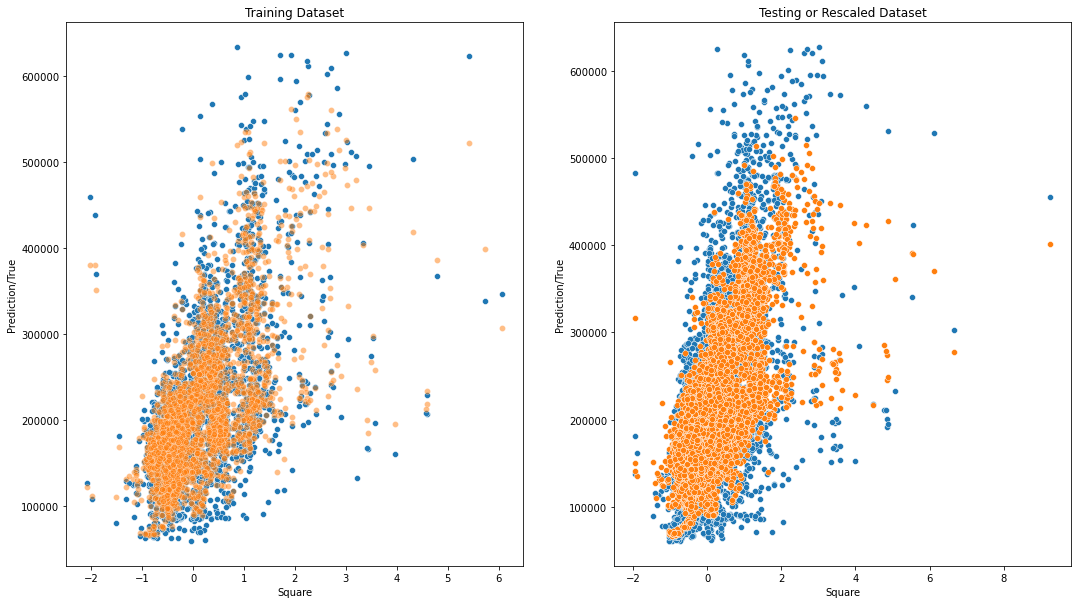

In [8]:
# Ghtlобработка завершена

#################### Приступаем к модели ####################


# Параметры отобраны автоматически, а потом отредактированы вручную перебором:
# В конечном итоге единственная созданная мной доп метрика оказалась бесполезна
# Других идей нет
features = ['Square_proc', 'Social_2', 'Social_1', 'Rooms', 'Social_3', 
            'Ecology_1', 'DistrictId', 'HouseYear', 'HouseFloor', 'Floor',
            'Healthcare_1']


#################### Standartisation and scaling
# Для случайного леса масштабирование не нужно, но так как я проверял много 
# моделей он был необходим, а остановившись на RandomForestRegressor заметил, 
# что RobustScaler несколько улучшает результаты. По видимому я не очень хорошо
# обработал выбросы.

x_scaler = RobustScaler()
y_scaler = RobustScaler()
X_scaled = x_scaler.fit_transform(train_df_enc[features])
y_scaled = y_scaler.fit_transform(train_df_enc['Price'].values.reshape(-1, 1))

X = train_df_enc[features]
y = train_df_enc['Price']

#################### Modelling and avaluation

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.7, shuffle=True, random_state=150)

#################### RandomForestRegressor

# Параметры модели были отобраны методом перебора через вложенные цыклы. Grid search
# использовал для первого приблежения.
len(X_train[:,0])
rf_model = RandomForestRegressor(random_state=13,
                                     criterion='mse',
                                     n_estimators = 66,
                                     max_features = 'sqrt',
                                     max_depth = 20)
rf_model.fit(X_train, y_train)
# rf_model.get_params()
    
y_train_preds = rf_model.predict(X_train)
y_test_preds = rf_model.predict(X_test)

evaluate_preds(y_train, y_train_preds, 
               y_test, y_test_preds, 
               X_train[:,0], X_test[:,0])

Train R2:	0.959
Test R2:	1.0


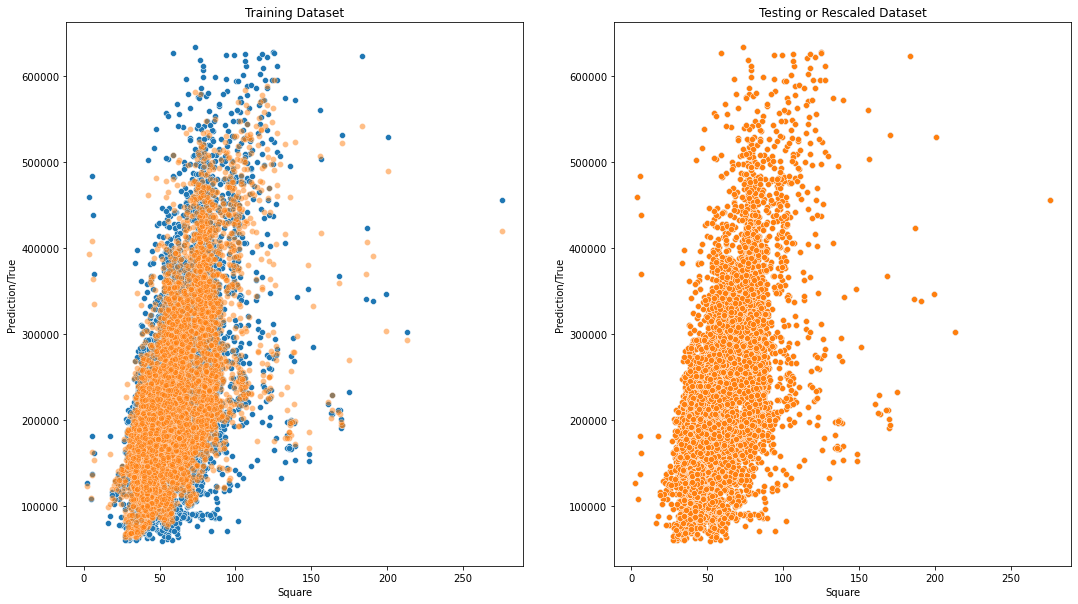

In [9]:
# Даже при очень маленькой тренировочной выборке (30%) модель показала 
# достаточно хорошие результаты. Учитывая шумность данных Test R2:	0.725 при
# условии что test_size=0.7 считаю вполне удовлетворительным результатом.

#################### Model Training

rf_model.fit(X_scaled, y_scaled.reshape(1,-1)[0])
y_pred = rf_model.predict(X_scaled)

y_pred = y_pred.reshape(-1,1)

# Inverse transform the prediction
y_pred_rescaled = y_scaler.inverse_transform(y_pred.reshape(1,-1))
#################### Check
evaluate_preds(train_df_enc['Price'].values, y_pred_rescaled.reshape(1,-1)[0],
               y.values, y.values,
               train_df_enc.Square_proc.values, train_df_enc.Square_proc.values)




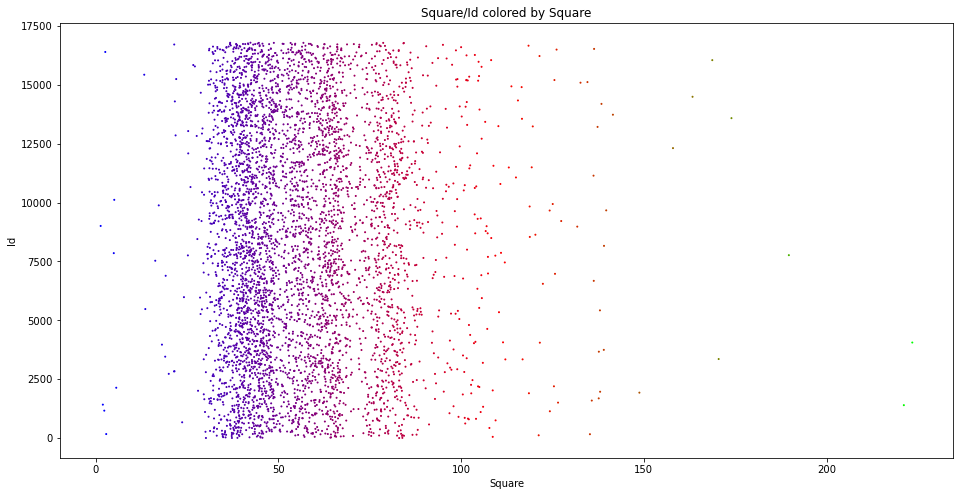

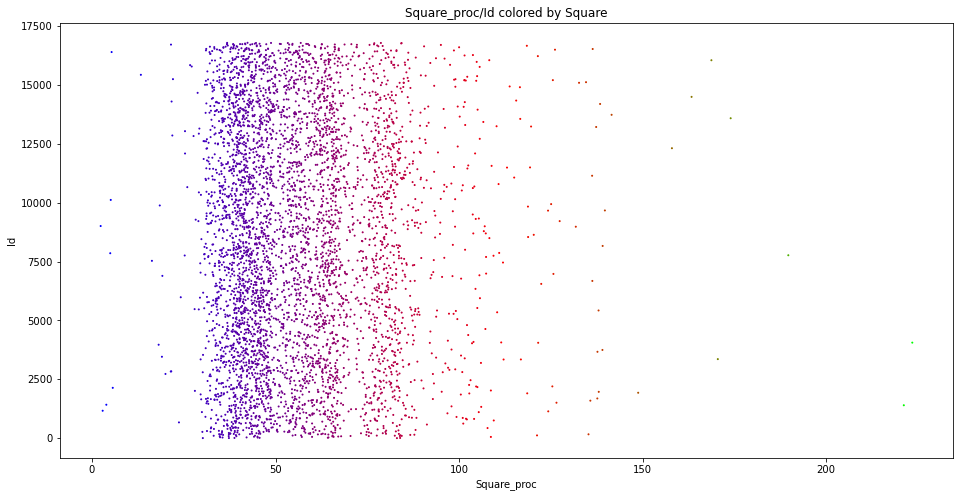

In [10]:
# Вроде рескейл прошел успешно, можно переходить 
# к обработке финального тестового файла

#################### Preprocessing test data set

# test_df.info()
test_df_enc = Enc(test_df.copy(),['Ecology_2', 'Ecology_3', 'Shops_2']) 
# test_df_enc.info()
test_desc = test_df_enc.describe()

# Выбросов по данным значительно меньше

test_df_enc.LifeSquare.fillna(0, inplace = True)
test_df_enc.KitchenSquare.fillna(0, inplace = True)

# Определим адекватные значения для площадей тренировочного сета:
s_max = train_df_enc.Square.quantile(0.99)
s_min = train_df_enc.Square.quantile(0.01)
sl_max = train_df_enc.LifeSquare.quantile(0.99)
sk_max = 26

test_df_enc['Square_proc'] = 0
for i in range(len(test_df_enc)):
    x,y,z = test_df_enc.Square.iloc[i],test_df_enc.LifeSquare.iloc[i],test_df_enc.KitchenSquare.iloc[i]
    test_df_enc.loc[i:i,'Square_proc'] = Square(x,y,z, s_max, s_min, sl_max, sk_max)

Plot('scatter', test_df_enc.Square, test_df_enc.Id,
     'Square/Id colored by Square',
     'Square','Id',1,test_df_enc.Square,'brg')
Plot('scatter', test_df_enc.Square_proc, test_df_enc.Id,
     'Square_proc/Id colored by Square',
     'Square_proc','Id',1,test_df_enc.Square_proc,'brg')

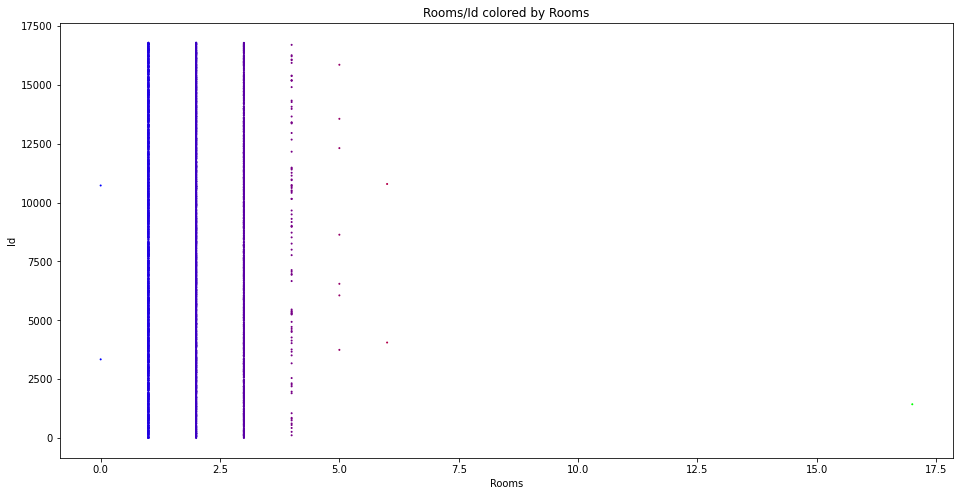

In [11]:
# По сути тут ничего не изменилось, поменялось всего несколько значений

# Обработка комнат, все значения что не соотносятся с площадью и выходят за пределы (1:6) будут перещитаны
# Комнаты до обработки:
Plot('scatter', test_df_enc.Rooms, test_df_enc.Id,
     'Rooms/Id colored by Rooms',
     'Rooms','Id',1,test_df_enc.Rooms,'brg')
med_sq_per_room = (test_df_enc.Square_proc/test_df_enc.Rooms).median()

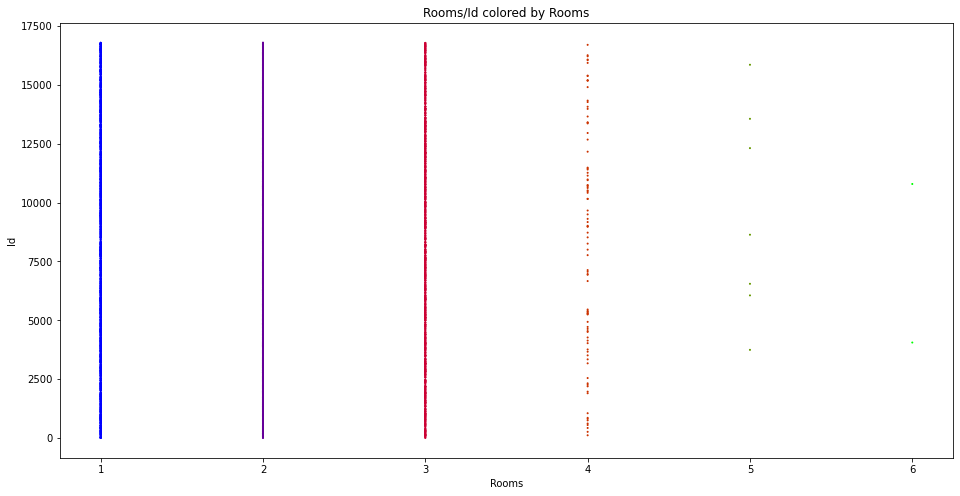

In [12]:
for i in range(len(test_df_enc)):
    rooms = test_df_enc.loc[i:i,'Rooms'].values[0]
    coef = (test_df_enc.loc[i:i,'Square_proc']/test_df_enc.loc[i:i,'Rooms']).values[0]
    if (coef/med_sq_per_room > 3 or coef/med_sq_per_room < 0.33) and (rooms>6 or rooms<1):
        test_df_enc.loc[i:i,'Rooms'] = np.round(test_df_enc.loc[i:i,'Square_proc']/med_sq_per_room).values[0]
# Комнаты после обработки:
Plot('scatter', test_df_enc.Rooms, test_df_enc.Id,
     'Rooms/Id colored by Rooms',
     'Rooms','Id',1,test_df_enc.Rooms,'brg')

In [13]:

# Переведем DistrictId в категоризированные переменные:
test_df_enc.DistrictId = test_df_enc.DistrictId.astype(str)

# Проверим есть ли у нас пропуски в данных:
for col in test_df_enc.columns:
    print(col, len(test_df_enc[test_df_enc[col].isna()]))

test_df_enc.Healthcare_1.fillna(0, inplace = True)

Id 0
DistrictId 0
Rooms 0
Square 0
LifeSquare 0
KitchenSquare 0
Floor 0
HouseFloor 0
HouseYear 0
Ecology_1 0
Ecology_2 0
Ecology_3 0
Social_1 0
Social_2 0
Social_3 0
Healthcare_1 2377
Helthcare_2 0
Shops_1 0
Shops_2 0
Square_proc 0


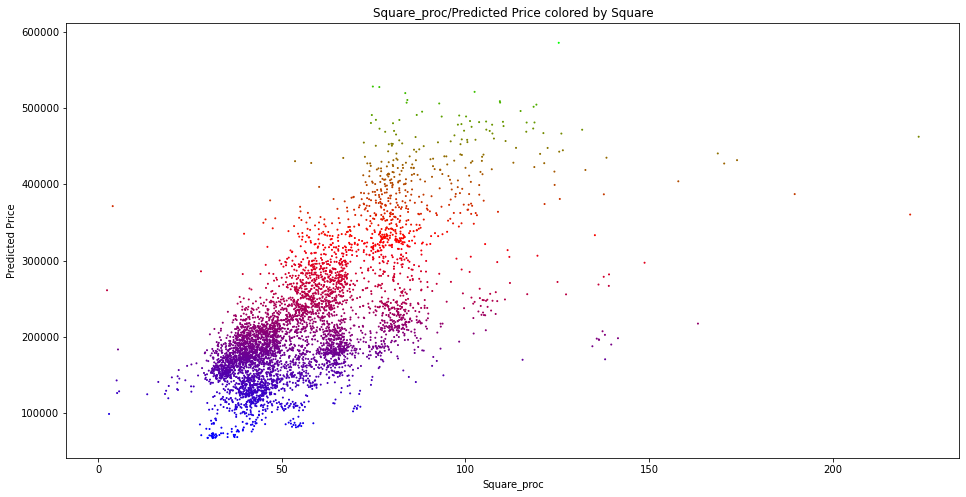

In [14]:
#################### Standartisation and scaling

X_test_scaled = x_scaler.transform(test_df_enc[features])

y_test_pred = rf_model.predict(X_test_scaled)


# Inverse transform the prediction
y_test_pred_rescaled = pd.DataFrame(y_scaler.inverse_transform(y_test_pred.reshape(-1,1)), columns = ['Price'])
y_test_pred_rescaled = pd.concat([test_df_enc.Id, y_test_pred_rescaled], axis = 1)
#################### Check
Plot('scatter', test_df_enc.Square_proc, y_test_pred_rescaled.Price,
     'Square_proc/Predicted Price colored by Square',
     'Square_proc','Predicted Price',1,y_test_pred_rescaled.Price,'brg')
# Вроде рескейл прошел успешно, можно экспортировать данные

#################### Export
y_test_pred_rescaled.to_csv(out, index = None)